<a href="https://colab.research.google.com/github/mnechromancer/JUMP-exercises/blob/main/PySpark_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apache Spark is written is Scala, an Object-Functional language that runs on the Java Virtual Machine(jvm).  In order to run Spark, we must install a compatiable version of Java into our virtual environment.  In this case, Java 8.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Next, we must install a version of Spark from an online repository, and unarchive the file.

In [2]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

PySpark is a Python API for Spark, allowing us to access Spark Functionality through Python code.  The findsaprk package will allow us to load Spark into our Python environment

In [3]:
!pip install -q findspark

Setting Up Environment Variables

Python will use these environment variables to access the 

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

Setting up a Session

Spark Session is the entry point to SparkSQL, which will allow uas to create Spark RDDs and DataFrames

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [6]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

# Make df from csv

In [7]:
cars = spark.read.options(header="true", inferSchema="true").csv('/content/car_sales_table.csv')
cars.show()

+-------+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|StockID|        Make|        Model|ColorID|VehicleType|CostPrice|SpareParts|LaborCost|Registration_Date|Mileage|PurchaseDate|
+-------+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|      1| Rolls Royce|     Camargue|      1|     Saloon|    50000|       500|      750|         1/8/1985|  52500|    1/1/2012|
|      2|Aston Martin|          DBS|      2|      Coupe|    75000|       600|      550|         5/9/2007|  75000|    1/1/2012|
|      3| Rolls Royce| Silver Ghost|      3|     Saloon|    75000|       750|      550|         9/8/2006|  52500|    1/1/2012|
|      4| Rolls Royce| Silver Ghost|      2|     Saloon|    88000|        85|      550|         1/5/1987| 127220|    1/1/2012|
|      5| Rolls Royce|     Camargue|      5|     Saloon|    62000|      2500|      550|         1/8/1985|  5250

# This won't work

In [8]:
cars.index = cars.StockID
cars.show()

+-------+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|StockID|        Make|        Model|ColorID|VehicleType|CostPrice|SpareParts|LaborCost|Registration_Date|Mileage|PurchaseDate|
+-------+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|      1| Rolls Royce|     Camargue|      1|     Saloon|    50000|       500|      750|         1/8/1985|  52500|    1/1/2012|
|      2|Aston Martin|          DBS|      2|      Coupe|    75000|       600|      550|         5/9/2007|  75000|    1/1/2012|
|      3| Rolls Royce| Silver Ghost|      3|     Saloon|    75000|       750|      550|         9/8/2006|  52500|    1/1/2012|
|      4| Rolls Royce| Silver Ghost|      2|     Saloon|    88000|        85|      550|         1/5/1987| 127220|    1/1/2012|
|      5| Rolls Royce|     Camargue|      5|     Saloon|    62000|      2500|      550|         1/8/1985|  5250

# This kind of works

In [9]:
cars = cars.withColumnRenamed("StockID", "Index")
cars.show()

+-----+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|Index|        Make|        Model|ColorID|VehicleType|CostPrice|SpareParts|LaborCost|Registration_Date|Mileage|PurchaseDate|
+-----+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|    1| Rolls Royce|     Camargue|      1|     Saloon|    50000|       500|      750|         1/8/1985|  52500|    1/1/2012|
|    2|Aston Martin|          DBS|      2|      Coupe|    75000|       600|      550|         5/9/2007|  75000|    1/1/2012|
|    3| Rolls Royce| Silver Ghost|      3|     Saloon|    75000|       750|      550|         9/8/2006|  52500|    1/1/2012|
|    4| Rolls Royce| Silver Ghost|      2|     Saloon|    88000|        85|      550|         1/5/1987| 127220|    1/1/2012|
|    5| Rolls Royce|     Camargue|      5|     Saloon|    62000|      2500|      550|         1/8/1985|  52500|    1/1/2012|


# Indexes (sort of)

In [10]:
cars.collect()[2:5]
# or
cars.filter(cars.Index.isin([3, 4, 5])).show()

+-----+-----------+------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|Index|       Make|       Model|ColorID|VehicleType|CostPrice|SpareParts|LaborCost|Registration_Date|Mileage|PurchaseDate|
+-----+-----------+------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|    3|Rolls Royce|Silver Ghost|      3|     Saloon|    75000|       750|      550|         9/8/2006|  52500|    1/1/2012|
|    4|Rolls Royce|Silver Ghost|      2|     Saloon|    88000|        85|      550|         1/5/1987| 127220|    1/1/2012|
|    5|Rolls Royce|    Camargue|      5|     Saloon|    62000|      2500|      550|         1/8/1985|  52500|    1/1/2012|
+-----+-----------+------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+



In [11]:
cars.collect()[3:6]
# or
cars.filter(cars.Index.isin([4, 5, 6])).show()

+-----+-----------+------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|Index|       Make|       Model|ColorID|VehicleType|CostPrice|SpareParts|LaborCost|Registration_Date|Mileage|PurchaseDate|
+-----+-----------+------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+
|    4|Rolls Royce|Silver Ghost|      2|     Saloon|    88000|        85|      550|         1/5/1987| 127220|    1/1/2012|
|    5|Rolls Royce|    Camargue|      5|     Saloon|    62000|      2500|      550|         1/8/1985|  52500|    1/1/2012|
|    6|Rolls Royce|    Camargue|      8|     Saloon|   125000|      4000|      550|         5/6/1986|  28750|    1/1/2012|
+-----+-----------+------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+



# Aggregates

In [12]:
max_mileage_row = max(cars.select("Mileage").collect())
print(f"Maximum mileage: {max_mileage_row.Mileage}")

Maximum mileage: 161000


In [24]:
CostPrice_col_ints = [i.CostPrice for i in cars.select("CostPrice").collect()]
costPrice_sum = sum(CostPrice_col_ints)
print(f"Sum of Cost: {costPrice_sum}")

Sum of Cost: 20510095


# Makes and models

In [33]:
makes_and_models = cars.groupBy("Make", "Model").count().select(["Make"]).groupby("Make").count().withColumnRenamed("count", "Line Count")
makes_and_models.show()

+------------+----------+
|        Make|Line Count|
+------------+----------+
|      Jaguar|         3|
|         TVR|         2|
| Rolls Royce|         6|
|         MGB|         1|
|     Triumph|         3|
|     Bentley|         4|
|Aston Martin|         8|
+------------+----------+



# Cost evaluations

In [34]:
total_cars = cars.groupBy("Make").count().withColumnRenamed("count", "Total Count")
total_cars.show()

+------------+-----------+
|        Make|Total Count|
+------------+-----------+
|      Jaguar|        129|
|         TVR|         15|
| Rolls Royce|         63|
|         MGB|         36|
|     Triumph|         36|
|     Bentley|         72|
|Aston Martin|        110|
+------------+-----------+



In [35]:
cost_sums = cars.groupBy("Make").sum("CostPrice").withColumnRenamed("sum(CostPrice)", "Sum Product Worth")
cost_sums.show()

+------------+-----------------+
|        Make|Sum Product Worth|
+------------+-----------------+
|      Jaguar|          4899700|
|         TVR|           612500|
| Rolls Royce|          4116225|
|         MGB|           342000|
|     Triumph|           655500|
|     Bentley|          3179400|
|Aston Martin|          6704770|
+------------+-----------------+



In [36]:
cost_maxes = cars.groupBy("Make").max("CostPrice").withColumnRenamed("max(CostPrice)", "Highest Model Value")
cost_maxes.show()

+------------+-------------------+
|        Make|Highest Model Value|
+------------+-------------------+
|      Jaguar|              67000|
|         TVR|              42500|
| Rolls Royce|             130000|
|         MGB|              13500|
|     Triumph|              22000|
|     Bentley|              67000|
|Aston Martin|             160000|
+------------+-------------------+



In [37]:
glom = makes_and_models.join(cost_sums, on="Make").join(cost_maxes, on="Make").join(total_cars, on="Make")
glom.show()

+------------+----------+-----------------+-------------------+-----------+
|        Make|Line Count|Sum Product Worth|Highest Model Value|Total Count|
+------------+----------+-----------------+-------------------+-----------+
|      Jaguar|         3|          4899700|              67000|        129|
|         TVR|         2|           612500|              42500|         15|
| Rolls Royce|         6|          4116225|             130000|         63|
|         MGB|         1|           342000|              13500|         36|
|     Triumph|         3|           655500|              22000|         36|
|     Bentley|         4|          3179400|              67000|         72|
|Aston Martin|         8|          6704770|             160000|        110|
+------------+----------+-----------------+-------------------+-----------+



# Add profits column

In [18]:
added_profits = cars.withColumn("Profit", cars.CostPrice - (cars.LaborCost + cars.SpareParts))
added_profits.show()

+-----+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+------+
|Index|        Make|        Model|ColorID|VehicleType|CostPrice|SpareParts|LaborCost|Registration_Date|Mileage|PurchaseDate|Profit|
+-----+------------+-------------+-------+-----------+---------+----------+---------+-----------------+-------+------------+------+
|    1| Rolls Royce|     Camargue|      1|     Saloon|    50000|       500|      750|         1/8/1985|  52500|    1/1/2012| 48750|
|    2|Aston Martin|          DBS|      2|      Coupe|    75000|       600|      550|         5/9/2007|  75000|    1/1/2012| 73850|
|    3| Rolls Royce| Silver Ghost|      3|     Saloon|    75000|       750|      550|         9/8/2006|  52500|    1/1/2012| 73700|
|    4| Rolls Royce| Silver Ghost|      2|     Saloon|    88000|        85|      550|         1/5/1987| 127220|    1/1/2012| 87365|
|    5| Rolls Royce|     Camargue|      5|     Saloon|    62000|      2500| 

# Plotting in PySpark

In [19]:
import matplotlib.pyplot as plt

In [20]:
added_profits_pd = added_profits.toPandas()
added_profits_pd.head()

,Index,Make,Model,ColorID,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate,Profit
0,1,Rolls Royce,Camargue,1,Saloon,50000,500,750,1/8/1985,52500,1/1/2012,48750
1,2,Aston Martin,DBS,2,Coupe,75000,600,550,5/9/2007,75000,1/1/2012,73850
2,3,Rolls Royce,Silver Ghost,3,Saloon,75000,750,550,9/8/2006,52500,1/1/2012,73700
3,4,Rolls Royce,Silver Ghost,2,Saloon,88000,85,550,1/5/1987,127220,1/1/2012,87365
4,5,Rolls Royce,Camargue,5,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012,58950


['Aston Martin', 'Bentley', 'Jaguar', 'MGB', 'Rolls Royce', 'TVR', 'Triumph']
[59251.86363636364, 41020.25, 36084.17054263566, 8862.5, 63784.28571428572, 40108.333333333336, 17616.666666666668]


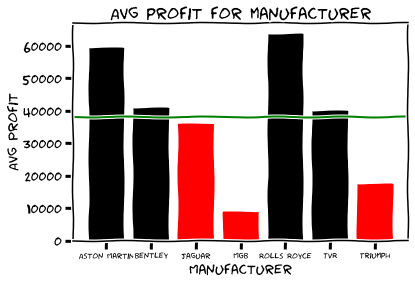

In [21]:
makers_grouped = added_profits_pd.groupby("Make")
profits_pdf = makers_grouped.Profit.mean().reset_index()
makers_list = profits_pdf["Make"].tolist()
print(makers_list)
average_profits = profits_pdf["Profit"].tolist()
print(average_profits)
total_average = profits_pdf["Profit"].mean()
colors = ["red" if avg < total_average else "black" for avg in average_profits]
with plt.xkcd(scale=0.5, randomness=4):
    plt.bar(makers_list, average_profits, color=colors)
    plt.title("Avg profit for manufacturer")
    plt.xlabel("Manufacturer")
    plt.ylabel("Avg Profit")
    plt.xticks(fontsize=8)
    plt.axhline(y=total_average, color='green')
    plt.show()

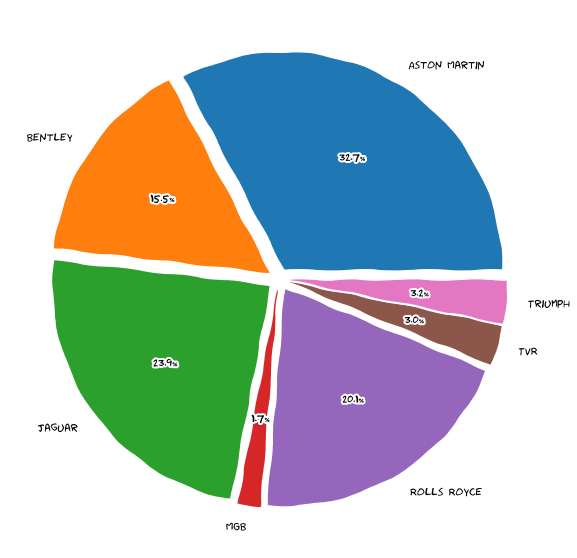

In [22]:
sales_pdf = makers_grouped.CostPrice.sum().reset_index()
with plt.xkcd(scale=0.7, length=80, randomness=4):
    plt.figure(figsize=(10, 10))
    plt.pie(sales_pdf["CostPrice"], labels=makers_list, autopct='%1.1f%%', textprops={'size': 11}, explode=[.05 for _ in  makers_list])
    plt.show()